In [1]:
import pandas as pd
import numpy as np

In [2]:
d=pd.read_csv("yds_data.csv")

In [3]:
d.head()

,0,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,...,lat/lng,type_of_shot,type_of_combined_shot,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
0,0,10.0,167.0,72.0,10.0,1.0,0.0,2000-01,27.0,38.0,...,"45.539131, -122.651648",shot - 30,NaN,20000012,1610612747,10.00,1.0,50.608,54.2000,38.0
1,1,12.0,-157.0,0.0,10.0,1.0,0.0,2000-01,22.0,35.0,...,"45.539131, -122.651648",shot - 45,NaN,20000012,1610612747,10.00,1.0,28.800,22.0000,35.0
2,2,35.0,-101.0,135.0,7.0,1.0,0.0,2000-01,45.0,36.0,...,"45.539131, -122.651648",shot - 25,NaN,20000012,1610612747,92.64,1.0,0.000,63.7216,54.4
3,3,43.0,138.0,175.0,6.0,1.0,0.0,2000-01,52.0,42.0,...,"45.539131, -122.651648",NaN,shot - 3,20000012,1610612747,NaN,1.0,122.608,52.0000,42.0
4,4,155.0,0.0,0.0,NaN,2.0,0.0,2000-01,19.0,20.0,...,"45.539131, -122.651648",NaN,shot - 1,20000012,1610612747,42.64,2.0,0.000,19.0000,20.0


In [4]:
d.rename(columns={"0":"index"},inplace=True)

In [5]:
d.isnull().sum()

index                        0
match_event_id            1563
location_x                1461
location_y                1540
remaining_min             1562
power_of_shot             1486
knockout_match            1517
game_season               5862
remaining_sec             1594
distance_of_shot          1567
is_goal                   6268
area_of_shot              1502
shot_basics               1575
range_of_shot             1564
team_name                 1535
date_of_game              1550
home/away                 1497
shot_id_number            1563
lat/lng                   1565
type_of_shot             15280
type_of_combined_shot    15417
match_id                     0
team_id                      0
remaining_min.1           1535
power_of_shot.1           1539
knockout_match.1          1493
remaining_sec.1           1539
distance_of_shot.1        1568
dtype: int64

In [6]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 28 columns):
index                    30697 non-null int64
match_event_id           29134 non-null float64
location_x               29236 non-null float64
location_y               29157 non-null float64
remaining_min            29135 non-null float64
power_of_shot            29211 non-null float64
knockout_match           29180 non-null float64
game_season              24835 non-null object
remaining_sec            29103 non-null float64
distance_of_shot         29130 non-null float64
is_goal                  24429 non-null float64
area_of_shot             29195 non-null object
shot_basics              29122 non-null object
range_of_shot            29133 non-null object
team_name                29162 non-null object
date_of_game             29147 non-null object
home/away                29200 non-null object
shot_id_number           29134 non-null float64
lat/lng                  29132 non-n

In [7]:
d['game_season'].value_counts()

2005-06    1911
2002-03    1823
2008-09    1810
2007-08    1733
2009-10    1665
2001-02    1632
2006-07    1537
2000-01    1488
2010-11    1462
2003-04    1329
2011-12    1326
2012-13    1296
1999-00    1264
2004-05    1074
2015-16     893
1997-98     804
1998-99     752
2014-15     594
1996-97     381
2013-14      61
Name: game_season, dtype: int64

In [8]:
d.shape[0]

30697

In [9]:
d.drop(columns=["index",  'remaining_min.1', 'power_of_shot.1','knockout_match.1', 'remaining_sec.1', 'distance_of_shot.1'],inplace=True)

In [10]:
d.head()

,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,is_goal,...,range_of_shot,team_name,date_of_game,home/away,shot_id_number,lat/lng,type_of_shot,type_of_combined_shot,match_id,team_id
0,10.0,167.0,72.0,10.0,1.0,0.0,2000-01,27.0,38.0,NaN,...,16-24 ft.,Manchester United,2000-10-31,MANU @ POR,1.0,"45.539131, -122.651648",shot - 30,NaN,20000012,1610612747
1,12.0,-157.0,0.0,10.0,1.0,0.0,2000-01,22.0,35.0,0.0,...,8-16 ft.,Manchester United,2000-10-31,MANU @ POR,2.0,"45.539131, -122.651648",shot - 45,NaN,20000012,1610612747
2,35.0,-101.0,135.0,7.0,1.0,0.0,2000-01,45.0,36.0,1.0,...,16-24 ft.,Manchester United,2000-10-31,NaN,3.0,"45.539131, -122.651648",shot - 25,NaN,20000012,1610612747
3,43.0,138.0,175.0,6.0,1.0,0.0,2000-01,52.0,42.0,0.0,...,16-24 ft.,Manchester United,2000-10-31,MANU @ POR,4.0,"45.539131, -122.651648",NaN,shot - 3,20000012,1610612747
4,155.0,0.0,0.0,NaN,2.0,0.0,2000-01,19.0,20.0,1.0,...,Less Than 8 ft.,NaN,2000-10-31,MANU @ POR,5.0,"45.539131, -122.651648",NaN,shot - 1,20000012,1610612747


In [11]:
d.columns

Index(['match_event_id', 'location_x', 'location_y', 'remaining_min',
       'power_of_shot', 'knockout_match', 'game_season', 'remaining_sec',
       'distance_of_shot', 'is_goal', 'area_of_shot', 'shot_basics',
       'range_of_shot', 'team_name', 'date_of_game', 'home/away',
       'shot_id_number', 'lat/lng', 'type_of_shot', 'type_of_combined_shot',
       'match_id', 'team_id'],
      dtype='object')

In [12]:
d['date_of_game']=pd.to_datetime(d['date_of_game'],errors='coerce')

In [13]:
d['date_of_game'].dtype

dtype('<M8[ns]')

In [14]:
v=d['game_season'].unique()
v

array(['2000-01', nan, '2001-02', '2002-03', '2003-04', '2004-05',
       '2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2010-11',
       '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '1996-97',
       '1997-98', '1998-99', '1999-00'], dtype=object)

In [15]:
l=np.arange(len(v))
l

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [16]:
d['game_season'].replace(to_replace=v,value=l,inplace=True)
d['game_season'].head()

0    0
1    0
2    0
3    0
4    0
Name: game_season, dtype: int64

In [17]:
d['power_of_shot'].fillna(d['power_of_shot'].mean(),inplace=True)

In [18]:
d['type_of_combined_shot'].fillna(method='pad',inplace=True)

In [19]:
d['type_of_combined_shot'].value_counts()

shot - 3    23563
shot - 4     5484
shot - 1     1186
shot - 5      181
shot - 0      143
shot - 2      137
Name: type_of_combined_shot, dtype: int64

In [20]:
x=d['type_of_combined_shot'].value_counts().keys()[0]

In [21]:
d['type_of_combined_shot'].fillna(value=x,inplace=True)

In [22]:
d['type_of_combined_shot'].value_counts()

shot - 3    23566
shot - 4     5484
shot - 1     1186
shot - 5      181
shot - 0      143
shot - 2      137
Name: type_of_combined_shot, dtype: int64

In [23]:
d['remaining_sec'].fillna(value=d['remaining_sec'].median(),inplace=True)

In [24]:
d['remaining_sec']=d['remaining_sec'].astype('int')

In [25]:
d['shot_id_number']=pd.Series(np.arange(1,d.shape[0]+1))

In [26]:
d['shot_id_number'].isnull().sum()

0

In [27]:
d['location_x'].fillna(d['location_x'].median(),inplace=True)

In [28]:
d['location_y'].fillna(0,inplace=True)

In [29]:
col = ['home/away','lat/lng', 'team_name','match_id','match_event_id', 'team_id', 'remaining_min', 'knockout_match',  'game_season' ]
d.loc[:,col] = d.loc[:,col].ffill()

In [30]:
d['range_of_shot'].value_counts()

Less Than 8 ft.    8933
16-24 ft.          7892
8-16 ft.           6290
24+ ft.            5937
Back Court Shot      81
Name: range_of_shot, dtype: int64

In [31]:
# Filling Missing Values In "shot_basics" based on "range_of_short" column!
# if the range of the shot is 16-24 ft it's a mid range shot
d.loc[(d.range_of_shot == '16-24 ft.'), 'shot_basics'] = d[d.range_of_shot == '16-24 ft.'].shot_basics.fillna(value='Mid Range')

# if the range of the shot is less than 8 ft then randomly assign goal line or goal area value to the shot 
d.loc[(d.range_of_shot == 'Less Than 8 ft.')&(d.shot_basics.isnull()), 'shot_basics']   =  pd.Series(d[(d.range_of_shot == 'Less Than 8 ft.')&(d.shot_basics.isnull())].shot_basics.apply(lambda x: x if type(x)==str else np.random.choice(['Goal Area', 'Goal Line'],1,p=[0.7590347263095939, 0.24096527369040613])[0]))
# if the range of the shot is  8-16 ft then randomly assign goal line or mid range value to the shot
d.loc[(d.range_of_shot == '8-16 ft.')&(d.shot_basics.isnull()), 'shot_basics']          =  pd.Series(d[(d.range_of_shot == '8-16 ft.')&(d.shot_basics.isnull())].shot_basics.apply(lambda x: x if type(x)==str else np.random.choice(['Mid Range', 'Goal Line'],1,p=[0.6488754615642833, 0.35112453843571667])[0]))
# if the range of the shot is more than 24 ft then randomly assign one of the values from'Penalty Spot', 'Right Corner', 'Left Corner' to shot_basic field
d.loc[(d.range_of_shot == '24+ ft.')&(d.shot_basics.isnull()), 'shot_basics']            =  pd.Series(d[(d.range_of_shot == '24+ ft.')&(d.shot_basics.isnull())].shot_basics.apply(lambda x: x if type(x)==str else np.random.choice(['Penalty Spot', 'Right Corner', 'Left Corner'],1,p=[0.8932384341637011, 0.06192170818505338, 0.044839857651245554])[0]))
# if the shot is a back court shot then randomly assign one of the values from''Mid Ground Line', 'Penalty Spot' to shot_basic field
d.loc[(d.range_of_shot == 'Back Court Shot')&(d.shot_basics.isnull()), 'shot_basics']    =  pd.Series(d[(d.range_of_shot == 'Back Court Shot')&(d.shot_basics.isnull())].shot_basics.apply(lambda x: x if type(x)==str else np.random.choice(['Mid Ground Line', 'Penalty Spot'],1,p=[0.8441558441558441, 0.15584415584415584])[0]))
d.isna().sum()

match_event_id               0
location_x                   0
location_y                   0
remaining_min                0
power_of_shot                0
knockout_match               0
game_season                  0
remaining_sec                0
distance_of_shot          1567
is_goal                   6268
area_of_shot              1502
shot_basics                 66
range_of_shot             1564
team_name                    0
date_of_game              1550
home/away                    0
shot_id_number               0
lat/lng                      0
type_of_shot             15280
type_of_combined_shot        0
match_id                     0
team_id                      0
dtype: int64

In [32]:
# Filling Missing Values In "range_of_short" based on "short_basics" column!

# if shot_basics is Goal Area, then range of shot is Less Than 8 ft
d.loc[(d.shot_basics == 'Goal Area'), 'range_of_shot']       = d[d.shot_basics == 'Goal Area'].range_of_shot.fillna(value='Less Than 8 ft.')
# if shot_basics is Penalty Spot, then range of shot is  24+ ft.
d.loc[(d.shot_basics == 'Penalty Spot'), 'range_of_shot']    = d[d.shot_basics == 'Penalty Spot'].range_of_shot.fillna(value= '24+ ft.')
# if shot_basics is Right Corner, then range of shot is  24+ ft.
d.loc[(d.shot_basics == 'Right Corner'), 'range_of_shot']    = d[d.shot_basics == 'Right Corner'].range_of_shot.fillna(value='24+ ft.')
# if shot_basics is Left Corner, then range of shot is  24+ ft.
d.loc[(d.shot_basics == 'Left Corner'), 'range_of_shot']     = d[d.shot_basics == 'Left Corner'].range_of_shot.fillna(value='24+ ft.')
# if shot_basics is Mid Ground Line , then range of shot is  Back Court Shot
d.loc[(d.shot_basics == 'Mid Ground Line'), 'range_of_shot'] = d[d.shot_basics == 'Mid Ground Line'].range_of_shot.fillna(value='Back Court Shot')
# if shot_basics is Mid Range then randomly assign '16-24 ft.' or  '8-16 ft.' to range of shot
d.loc[(d.shot_basics == 'Mid Range')&(d.range_of_shot.isnull()), 'range_of_shot']       = pd.Series(d[(d.shot_basics == 'Mid Range')&(d.range_of_shot.isnull())].range_of_shot.apply(lambda x: x if type(x)==str else np.random.choice(['16-24 ft.', '8-16 ft.'],1,p=[0.6527708850289495, 0.34722911497105047])[0]))
# if shot_basics is Goal Line then randomly assign ''8-16 ft.' or  'Less Than 8 ft.' to range of shot
d.loc[(d.shot_basics == 'Goal Line')&(d.range_of_shot.isnull()), 'range_of_shot']       = pd.Series(d[(d.shot_basics == 'Goal Line')&(d.range_of_shot.isnull())].range_of_shot.apply(lambda x: x if type(x)==str else np.random.choice(['8-16 ft.', 'Less Than 8 ft.'],1,p=[0.5054360956752839, 0.49456390432471614])[0]))

d.isnull().sum() # number of missing values for range_of_shot column should have been reduced

match_event_id               0
location_x                   0
location_y                   0
remaining_min                0
power_of_shot                0
knockout_match               0
game_season                  0
remaining_sec                0
distance_of_shot          1567
is_goal                   6268
area_of_shot              1502
shot_basics                 66
range_of_shot               66
team_name                    0
date_of_game              1550
home/away                    0
shot_id_number               0
lat/lng                      0
type_of_shot             15280
type_of_combined_shot        0
match_id                     0
team_id                      0
dtype: int64

In [33]:
d.shot_basics.fillna(method='ffill', inplace=True)
d.range_of_shot.fillna(method='ffill', inplace=True)

In [34]:
d['area_of_shot'].fillna(value='Center(C)', inplace=True)

In [35]:
d.isnull().sum()

match_event_id               0
location_x                   0
location_y                   0
remaining_min                0
power_of_shot                0
knockout_match               0
game_season                  0
remaining_sec                0
distance_of_shot          1567
is_goal                   6268
area_of_shot                 0
shot_basics                  0
range_of_shot                0
team_name                    0
date_of_game              1550
home/away                    0
shot_id_number               0
lat/lng                      0
type_of_shot             15280
type_of_combined_shot        0
match_id                     0
team_id                      0
dtype: int64

In [36]:
d['distance_of_shot'].fillna(method='pad',inplace=True)

In [37]:
d.loc[d['distance_of_shot'].isnull(), 'distance_of_shot'] = pd.Series(d.loc[d['distance_of_shot'].isnull(), 'distance_of_shot'].apply(lambda x: x if type(x)==str else np.random.choice([20,45,44,37],1,p=[0.5278056615137523,0.18630797028709095,0.14384661714515157,0.1420397510540052])[0])) 

In [38]:
l_goal   = d[d.is_goal == 1].type_of_shot.value_counts().head(6).keys() 

In [39]:
l_goal

Index(['shot - 4', 'shot - 39', 'shot - 44', 'shot - 36', 'shot - 15',
       'shot - 38'],
      dtype='object')

In [40]:
pgsum  = d[d.is_goal == 1].type_of_shot.value_counts().head(6).sum()
pgsum

2252

In [41]:
pgoal   = list(d[d.is_goal == 1].type_of_shot.value_counts().head(6) / pgsum)
pgoal

[0.2682060390763766,
 0.19182948490230906,
 0.14653641207815277,
 0.1447602131438721,
 0.12966252220248667,
 0.11900532859680284]

In [42]:
g = pd.Series(d[d.is_goal == 1].type_of_shot.apply(lambda x: x if type(x)==str else np.random.choice(l_goal,1,p=pgoal)[0]))
g

2        shot - 25
4         shot - 4
6        shot - 39
8        shot - 36
11        shot - 4
12       shot - 44
17        shot - 6
22       shot - 44
23       shot - 39
24       shot - 36
30       shot - 44
38       shot - 39
39        shot - 4
41       shot - 39
42       shot - 36
45       shot - 39
47       shot - 12
48       shot - 36
56       shot - 37
57        shot - 4
58       shot - 38
64       shot - 44
68        shot - 4
69       shot - 36
72       shot - 36
80       shot - 20
87       shot - 10
88       shot - 38
89       shot - 15
90        shot - 4
           ...    
30599    shot - 25
30600    shot - 44
30603    shot - 39
30606     shot - 4
30607    shot - 38
30608    shot - 38
30609     shot - 4
30611     shot - 4
30618    shot - 44
30622    shot - 39
30624    shot - 36
30627    shot - 35
30628    shot - 16
30632    shot - 28
30637    shot - 12
30639    shot - 44
30641    shot - 19
30644    shot - 36
30645    shot - 15
30647    shot - 40
30649    shot - 49
30652    sho

In [43]:
d.loc[(d.is_goal == 1)&(d.type_of_shot.isnull()), 'type_of_shot'] = g

In [44]:
nogoal   = d[d.is_goal == 0].type_of_shot.value_counts().head(6).keys()    

In [45]:
nogoal

Index(['shot - 36', 'shot - 39', 'shot - 4', 'shot - 15', 'shot - 38',
       'shot - 43'],
      dtype='object')

In [46]:
pngsum  = d[d.is_goal == 0].type_of_shot.value_counts().head(6).sum()

In [47]:
pnogoal=list(d[d.is_goal==0].type_of_shot.value_counts().head(6)/pngsum)
pnogoal

[0.30122002524190156,
 0.29995793016407235,
 0.11400925536390408,
 0.11022297013041649,
 0.1064366848969289,
 0.0681531342027766]

In [48]:
ng = pd.Series(d[d.is_goal == 0].type_of_shot.apply(lambda x: x if type(x)==str else np.random.choice(nogoal,1,p=pnogoal)[0]))
ng

1        shot - 45
3        shot - 15
5        shot - 17
9        shot - 44
10        shot - 7
13       shot - 39
14       shot - 12
15       shot - 43
18       shot - 36
20       shot - 20
25       shot - 15
26       shot - 30
27       shot - 54
28       shot - 43
29       shot - 42
31       shot - 36
40       shot - 39
43       shot - 36
46       shot - 15
50       shot - 39
51       shot - 39
52       shot - 25
53       shot - 39
55       shot - 36
60       shot - 36
62       shot - 39
63       shot - 39
67       shot - 21
73        shot - 0
74        shot - 1
           ...    
30640    shot - 50
30642     shot - 4
30643    shot - 39
30650    shot - 39
30651    shot - 38
30654     shot - 1
30656    shot - 39
30658    shot - 22
30660    shot - 36
30662    shot - 39
30663    shot - 55
30665     shot - 4
30666    shot - 36
30667     shot - 4
30669    shot - 43
30670    shot - 38
30671    shot - 15
30673    shot - 15
30675     shot - 4
30677    shot - 36
30678    shot - 36
30683    sho

In [49]:
d.loc[(d.is_goal == 0)&(d.type_of_shot.isnull()), 'type_of_shot'] = ng 

In [50]:
d.loc[d['type_of_shot'].isnull(), 'type_of_shot'] = pd.Series(d.loc[d['type_of_shot'].isnull(), 'type_of_shot'].apply(lambda x: x if type(x)==str else np.random.choice(['shot - 39', 'shot - 36', 'shot - 4'],1,p=[0.37377133988618727, 0.33419555095706155, 0.2920331091567512])[0])) 


In [51]:
d.drop(columns='date_of_game',inplace=True)

In [52]:
d.isnull().sum()

match_event_id              0
location_x                  0
location_y                  0
remaining_min               0
power_of_shot               0
knockout_match              0
game_season                 0
remaining_sec               0
distance_of_shot            0
is_goal                  6268
area_of_shot                0
shot_basics                 0
range_of_shot               0
team_name                   0
home/away                   0
shot_id_number              0
lat/lng                     0
type_of_shot                0
type_of_combined_shot       0
match_id                    0
team_id                     0
dtype: int64

In [53]:
d.loc[d.is_goal.isnull(),'type_of_shot']

0        shot - 30
7        shot - 36
16        shot - 4
19        shot - 4
21       shot - 24
32       shot - 34
33        shot - 4
34       shot - 39
35       shot - 39
36       shot - 36
37        shot - 1
44       shot - 39
49        shot - 4
54       shot - 36
59       shot - 14
61       shot - 39
65       shot - 39
66        shot - 4
70        shot - 9
71       shot - 39
75       shot - 36
79       shot - 22
84       shot - 36
85       shot - 39
86       shot - 10
91       shot - 54
94       shot - 39
96       shot - 12
103      shot - 52
112      shot - 49
           ...    
30567    shot - 54
30569    shot - 12
30580    shot - 25
30583    shot - 39
30590    shot - 39
30593    shot - 36
30613    shot - 42
30616    shot - 36
30617    shot - 44
30625    shot - 36
30629    shot - 36
30630    shot - 25
30631    shot - 39
30633    shot - 36
30635    shot - 48
30636     shot - 4
30638    shot - 21
30646     shot - 4
30648    shot - 36
30655     shot - 4
30659    shot - 36
30664    sho

In [54]:
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import cufflinks as cf

In [55]:
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [56]:
d.head()

,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,is_goal,...,shot_basics,range_of_shot,team_name,home/away,shot_id_number,lat/lng,type_of_shot,type_of_combined_shot,match_id,team_id
0,10.0,167.0,72.0,10.0,1.0,0.0,0,27,38.0,NaN,...,Mid Range,16-24 ft.,Manchester United,MANU @ POR,1,"45.539131, -122.651648",shot - 30,shot - 3,20000012,1610612747
1,12.0,-157.0,0.0,10.0,1.0,0.0,0,22,35.0,0.0,...,Mid Range,8-16 ft.,Manchester United,MANU @ POR,2,"45.539131, -122.651648",shot - 45,shot - 3,20000012,1610612747
2,35.0,-101.0,135.0,7.0,1.0,0.0,0,45,36.0,1.0,...,Mid Range,16-24 ft.,Manchester United,MANU @ POR,3,"45.539131, -122.651648",shot - 25,shot - 3,20000012,1610612747
3,43.0,138.0,175.0,6.0,1.0,0.0,0,52,42.0,0.0,...,Mid Range,16-24 ft.,Manchester United,MANU @ POR,4,"45.539131, -122.651648",shot - 15,shot - 3,20000012,1610612747
4,155.0,0.0,0.0,6.0,2.0,0.0,0,19,20.0,1.0,...,Goal Area,Less Than 8 ft.,Manchester United,MANU @ POR,5,"45.539131, -122.651648",shot - 4,shot - 1,20000012,1610612747


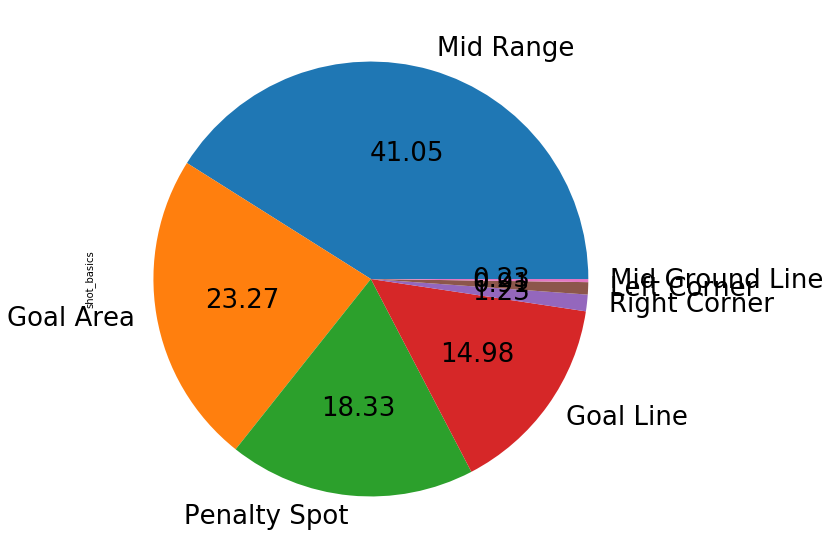

In [105]:
x=d['shot_basics'].value_counts()
x
x.plot.pie(figsize=(10,10),fontsize = 26, autopct = '%.2f')

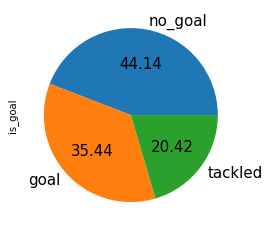

In [104]:
l=[]
y=d['is_goal']
for i in y:
    if i ==1:
        l.append('goal')
    elif i ==0:
        l.append('no_goal')
    else:
        l.append('tackled')
d1=pd.DataFrame(l,columns=['is_goal'])
x=d1['is_goal'].value_counts()
x.plot.pie(fontsize = 15, autopct = '%.2f')

In [ ]:
d['range_of_shot'].plot.pie(figsize=(10,10))

In [57]:
import seaborn as sns

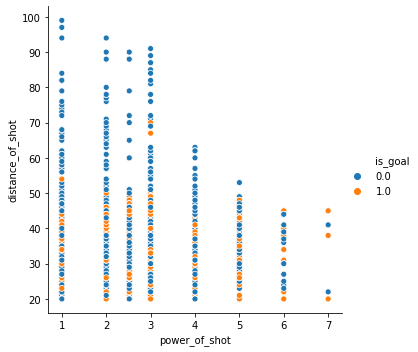

In [58]:
sns.relplot(x = 'power_of_shot', y = 'distance_of_shot',hue='is_goal', data = d)

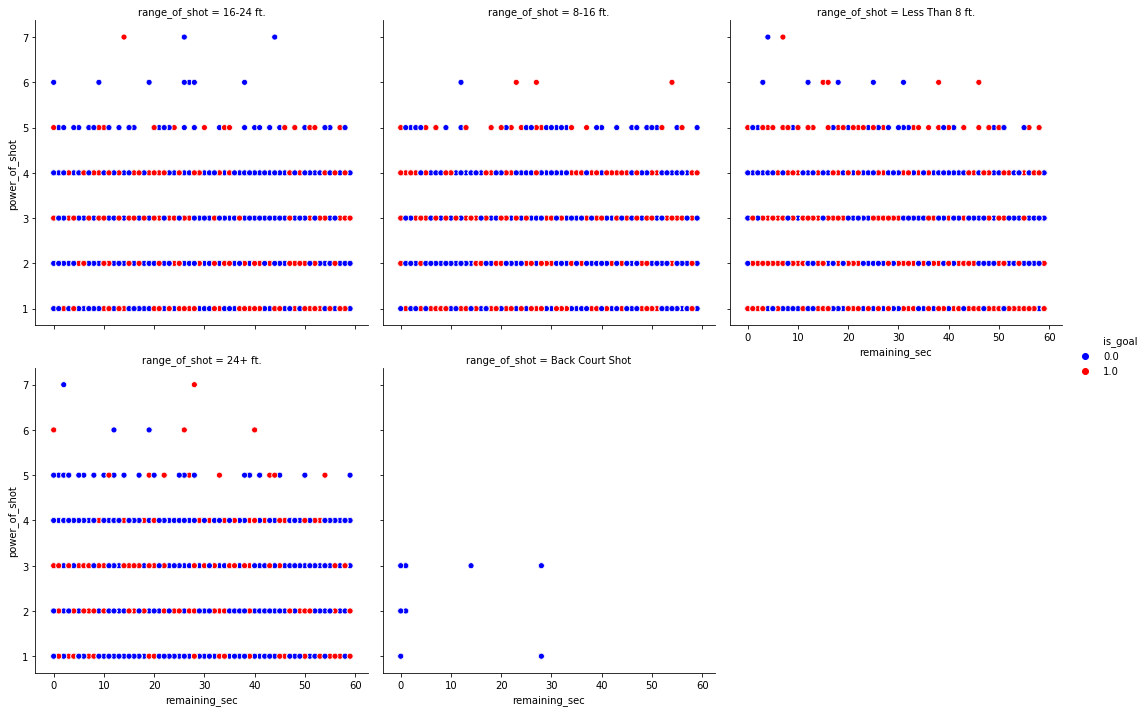

In [107]:
sns.relplot(x = 'remaining_sec', y = 'power_of_shot',hue='is_goal', data = d,col='range_of_shot',col_wrap=3,palette=['b','r'])

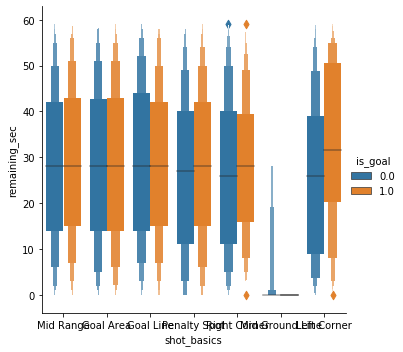

In [60]:
sns.catplot(x = 'shot_basics', y = 'remaining_sec', kind = 'boxen', data = d,hue='is_goal')

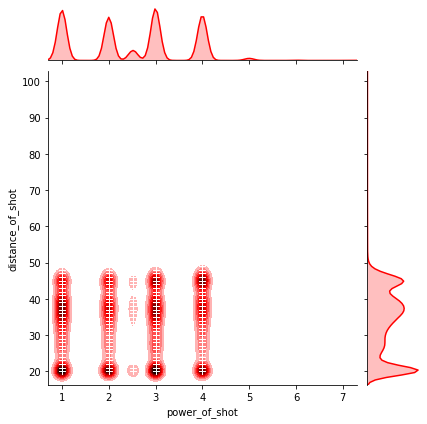

In [61]:
import matplotlib.pyplot as plt
x=d.power_of_shot
y=d.distance_of_shot
g = sns.jointplot(x, y, kind = 'kde', color = 'r')
g.plot_joint(plt.scatter, c = 'w', s = 30, linewidth = 1, marker = '+')
g.ax_joint.collections[0].set_alpha(0)

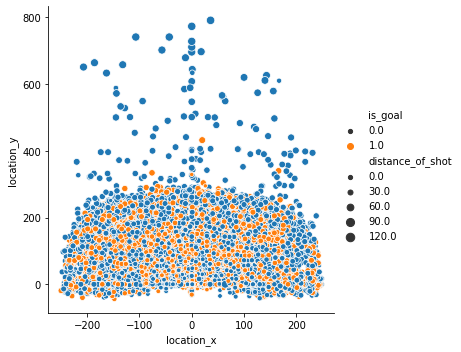

In [113]:
sns.relplot(x = 'location_x', y = 'location_y',hue='is_goal',size='distance_of_shot', data = d)

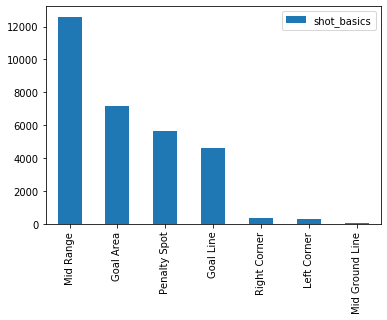

In [139]:
x=d['shot_basics'].value_counts()
z=pd.DataFrame(x)
z.plot(kind='bar')